Upload your CSV file:


Saving movie_watch.csv to movie_watch (3).csv

✅ Data Preview:


,watch_time_hour,genre_preference,avg_rating_given
0,13,action,2.037554
1,4,comedy,1.350365
2,15,thriller,1.359665
3,14,thriller,1.772998
4,14,comedy,1.202237


<ipython-input-4-3f946a4b614e>:40: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


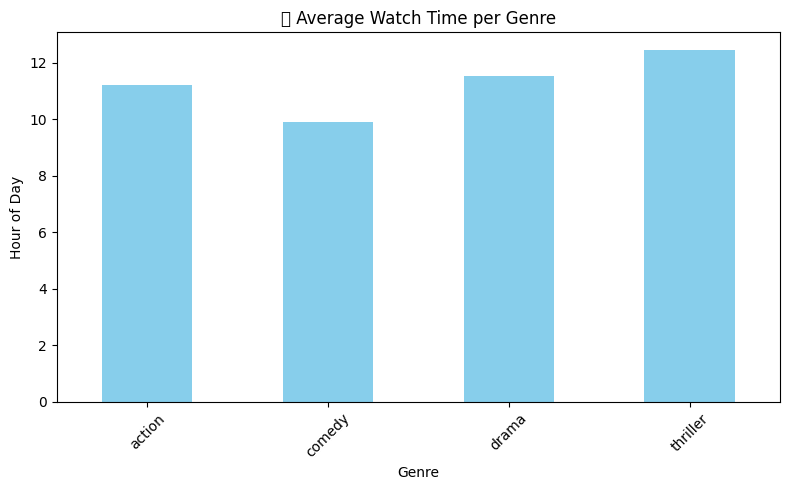

<ipython-input-4-3f946a4b614e>:52: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


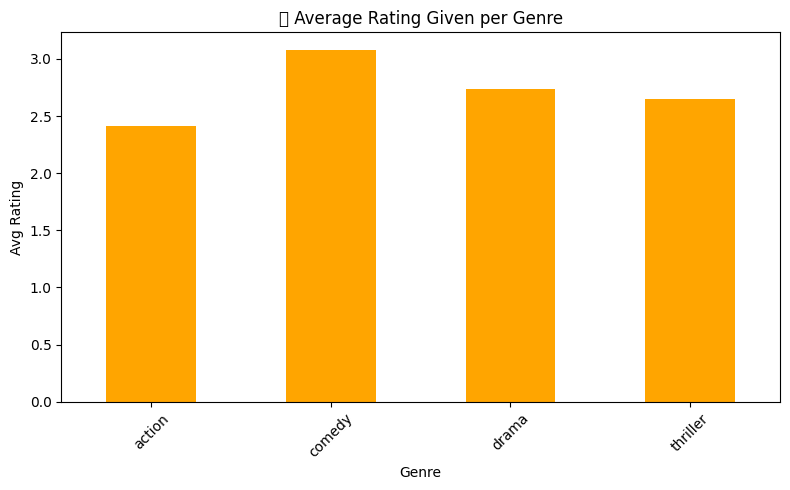

<ipython-input-4-3f946a4b614e>:61: UserWarning: Glyph 129383 (\N{PIE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129383 (\N{PIE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


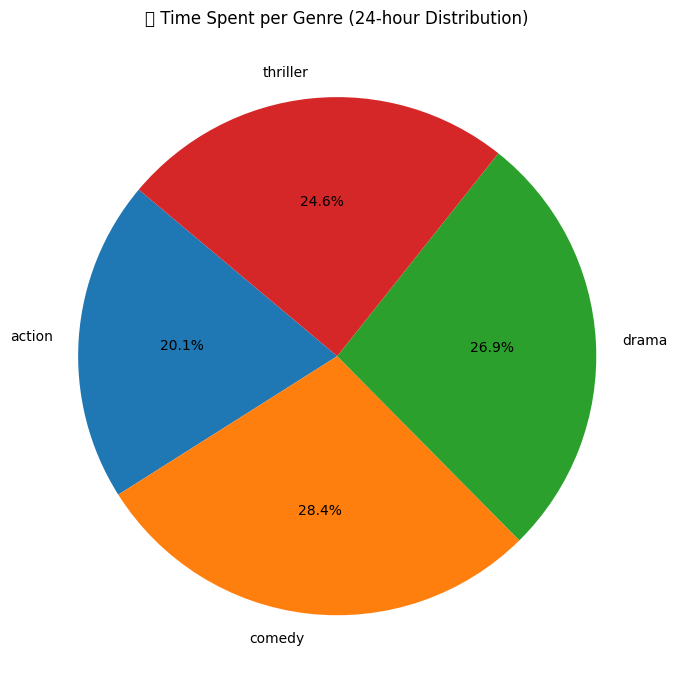

<ipython-input-4-3f946a4b614e>:84: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


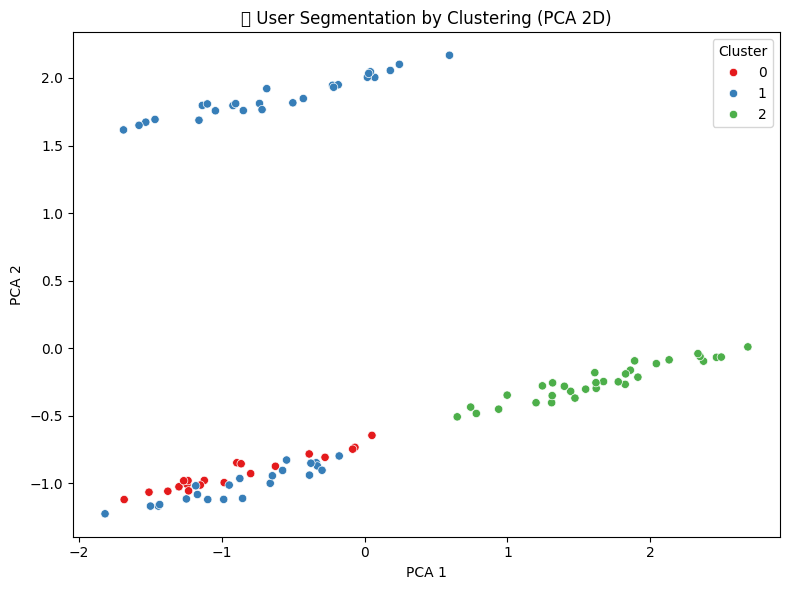

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


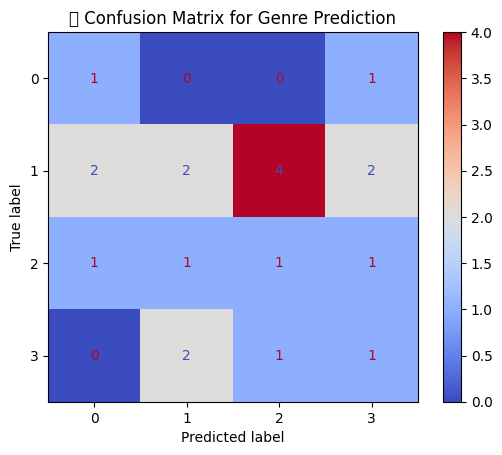


📈 Evaluation Metrics (Genre Prediction):

              precision    recall  f1-score   support

           0       0.25      0.50      0.33         2
           1       0.40      0.20      0.27        10
           2       0.17      0.25      0.20         4
           3       0.20      0.25      0.22         4

    accuracy                           0.25        20
   macro avg       0.25      0.30      0.26        20
weighted avg       0.30      0.25      0.25        20



In [4]:
# Required Libraries
from google.colab import files
import io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Step 1: Upload CSV
print("Upload your CSV file:")
uploaded = files.upload()

# Step 2: Load Data
for fn in uploaded.keys():
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))
    # Normalize genre_preference: remove spaces and unify case
df['genre_preference'] = df['genre_preference'].str.strip().str.lower()


print("\n✅ Data Preview:")
display(df.head())

# Step 3: Encode Genre for later classification
df['genre_encoded'] = LabelEncoder().fit_transform(df['genre_preference'])

# ----------------------📊 Visualization 1: Avg Time per Genre----------------------
avg_time = df.groupby('genre_preference')['watch_time_hour'].mean()

plt.figure(figsize=(8,5))
avg_time.plot(kind='bar', color='skyblue')
plt.title('📊 Average Watch Time per Genre')
plt.ylabel('Hour of Day')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ----------------------⭐ Visualization 2: Avg Rating per Genre----------------------
avg_rating = df.groupby('genre_preference')['avg_rating_given'].mean()

plt.figure(figsize=(8,5))
avg_rating.plot(kind='bar', color='orange')
plt.title('⭐ Average Rating Given per Genre')
plt.ylabel('Avg Rating')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ----------------------🥧 Pie Chart: Genre Time Distribution----------------------
genre_time = df.groupby('genre_preference')['watch_time_hour'].sum()

plt.figure(figsize=(7,7))
plt.pie(genre_time, labels=genre_time.index, autopct='%1.1f%%', startangle=140)
plt.title("🥧 Time Spent per Genre (24-hour Distribution)")
plt.tight_layout()
plt.show()

# ----------------------🧠 Clustering Based on Time, Genre, Rating----------------------
df_cluster = df.copy()
df_cluster = pd.get_dummies(df_cluster, columns=['genre_preference'])

scaler = StandardScaler()
X_cluster = scaler.fit_transform(df_cluster[['watch_time_hour', 'avg_rating_given'] + [col for col in df_cluster.columns if 'genre_preference_' in col]])

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_cluster)

# PCA 2D Plot
pca = PCA(n_components=2)
components = pca.fit_transform(X_cluster)

plt.figure(figsize=(8,6))
sns.scatterplot(x=components[:,0], y=components[:,1], hue=df['cluster'], palette='Set1')
plt.title("🧠 User Segmentation by Clustering (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# ----------------------🧪 Classification: Predict Genre ----------------------
X = df[['watch_time_hour', 'avg_rating_given']]
y = df['genre_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# ----------------------🔥 Confusion Matrix----------------------
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='coolwarm')
plt.title("🔥 Confusion Matrix for Genre Prediction")
plt.show()

# ----------------------📈 Evaluation Metrics----------------------
print("\n📈 Evaluation Metrics (Genre Prediction):\n")
print(classification_report(y_test, y_pred))
